Cara Run Program myConvex Hull

1.   Klik 'Runtime' pada bagian atas
2.   Klik 'Run All'
3.   Program akan menampilkan hasil secara otomatis di bagian paling bawah program



In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import math
import random

print("Implementasi Convex Hull")
print("1. Dataset Iris")
print("2. Dataset Wine")
print("3. Dataset Breast Cancer")
option = int(input("Input disini (1, 2, atau 3): "))
if option == 1:
    data = datasets.load_iris()
elif option == 2:
    data = datasets.load_wine()
elif option == 3:
    data = datasets.load_breast_cancer()

#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

Implementasi Convex Hull
1. Dataset Iris
2. Dataset Wine
3. Dataset Breast Cancer
Input disini (1, 2, atau 3): 2
(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [179]:
def myConvexHull(bucket):
    # Melakukan pengurutan kumpulan titik dari kiri ke kanan
    # Mengambil titik paling kiri dan paling kanan
    sortedbucket = sortPoint(bucket, 1)
    leftmost = sortedbucket[0]
    rightmost = sortedbucket[len(sortedbucket)-1]

    # Menghapus titik paling kiri dan paling kanan
    sortedbucket = np.delete(sortedbucket, 0, 0)
    sortedbucket = np.delete(sortedbucket, len(sortedbucket)-1, 0)
    
    # Membuat array kumpulan titik Convex Hull
    theConvexHull = np.vstack((leftmost,rightmost))

    # Menginisiasi dua bagian yang dipisahkan oleh garis pembagi
    # Garis pembagi terbentuk dari leftmost ke rightmost
    # S1 dan S2 terisi (S1 bagian kiri, S2 bagian kanan garis)
    S1 = np.array([[0, 0]])
    S2 = np.array([[0, 0]])
    S1, S2 = detFunction(sortedbucket, leftmost, rightmost, S1, S2)

    # Melakukan divide & conquer
    # -----------------------------------------------
    if len(S1) > 0:
        theConvexHull = convexHullRecursive1(S1, leftmost, rightmost, theConvexHull)
    if len(S2) > 0:
        theConvexHull = convexHullRecursive2(S2, leftmost, rightmost, theConvexHull)
    # -----------------------------------------------

    # Mengurutkan titik-titik convex hull agar memutar
    sortedHull = sortConvexHull(theConvexHull)
    x = sortedHull[:,0].tolist()
    y = sortedHull[:,1].tolist()

    # Menyimpan titik absis dan ordinat Convex Hull ke dalam matriks
    hull = []
    hull.append(x)
    hull.append(y)

    return hull

In [180]:
def sortConvexHull(theConvexHull):
    # Mengambil titik paling kiri dan kanan
    leftmost = theConvexHull[0]
    rightmost = theConvexHull[1]

    # Menghapus titik paling kiri dan kanan
    for d in range(2):
        theConvexHull = np.delete(theConvexHull, 0, axis=0)
    
    # Menginisiasi dua bagian yang dipisahkan oleh garis pembagi
    # Agar pengurutan titik secara melingkar dapat dilakukan
    up = np.array([[0, 0]])
    bottom = np.array([[0, 0]])
    up, bottom = detFunction(theConvexHull, leftmost, rightmost, up, bottom)
    up = sortPoint(up, 1)
    bottom = sortPoint(bottom, 0)

    # Mengurutkan titik-titik secara melingkar
    sortedHull = np.array([leftmost])
    sortedHull = np.vstack((sortedHull,up))
    sortedHull = np.vstack((sortedHull,rightmost))
    sortedHull = np.vstack((sortedHull,bottom))
    sortedHull = np.vstack((sortedHull,leftmost))

    return sortedHull
    

In [181]:
# Sorting dengan algoritma bubble sort
def sortPoint(bkt, isAscending):
  blen = len(bkt)
  if (isAscending):
    for i in range(blen-1):
      for j in range(0, blen-i-1):
        if bkt[j,0] > bkt[j + 1,0] :
          bkt[j,0], bkt[j + 1,0] = bkt[j + 1,0], bkt[j,0]
          bkt[j,1], bkt[j + 1,1] = bkt[j + 1,1], bkt[j,1]
        elif (bkt[j,0] == bkt[j + 1,0]):
          leftHigher = bkt[j,1] > bkt[j + 1,1]
          if (leftHigher):
            bkt[j,0], bkt[j + 1,0] = bkt[j + 1,0], bkt[j,0]
            bkt[j,1], bkt[j + 1,1] = bkt[j + 1,1], bkt[j,1]
  else:
    for i in range(blen-1):
      for j in range(0, blen-i-1):
        if bkt[j,0] < bkt[j + 1,0] :
          bkt[j,0], bkt[j + 1,0] = bkt[j + 1,0], bkt[j,0]
          bkt[j,1], bkt[j + 1,1] = bkt[j + 1,1], bkt[j,1]
        elif (bkt[j,0] == bkt[j + 1,0]):
          leftLower = bkt[j,1] < bkt[j + 1,1]
          if (leftLower):
            bkt[j,0], bkt[j + 1,0] = bkt[j + 1,0], bkt[j,0]
            bkt[j,1], bkt[j + 1,1] = bkt[j + 1,1], bkt[j,1]
  return bkt


In [182]:
# Fungsi determinan
# Mengembalikan dua himpunan berisi titik-titik
def detFunction(sortedbucket, leftmost, rightmost, S1, S2):
    for p3 in range(len(sortedbucket)):
        determinant = leftmost[0] * rightmost[1]
        determinant = determinant + sortedbucket[p3,0] * leftmost[1]
        determinant = determinant + rightmost[0] * sortedbucket[p3,1]
        determinant = determinant - sortedbucket[p3,0] * rightmost[1]
        determinant = determinant - rightmost[0] * leftmost[1]
        determinant = determinant - leftmost[0] * sortedbucket[p3,1]

        if determinant > 0:
            left = np.array([[sortedbucket[p3,0], sortedbucket[p3,1]]])
            S1 = np.vstack((S1,left))
            
        elif determinant < 0:
            right = np.array([[sortedbucket[p3,0], sortedbucket[p3,1]]])
            S2 = np.vstack((S2,right))
    S1 = np.delete(S1, 0, axis=0)
    S2 = np.delete(S2, 0, axis=0)
    return S1, S2

In [183]:
# Divide & Conquer untuk mencari Convex Hull
# D & C untuk bagian atas (S1)
def convexHullRecursive1(St, lpoint, rpoint, theConvexHull):
    if len(St) == 1: # Basis
        theConvexHull = np.vstack((theConvexHull,St[0]))
    else: # Rekursif
        # Mengambil titik awal sebagai acuan perbandingan
        maxP = St[0]
        maxPangle = 0
        maxDistanceP = pointToLineLength(maxP, lpoint, rpoint)
        maxPidx = 0

        # Mencari titik terjauh dari garis lpoint - rpoint
        for p in range(1,len(St)):
            p21 = np.array([rpoint[0]-lpoint[0], rpoint[1]-lpoint[1]])
            p13 = np.array([lpoint[0]-St[p,0], lpoint[1]-St[p,1]])
            distance = np.abs(np.cross(p21, p13)) / np.linalg.norm(p21)
            if distance >= maxDistanceP:
                if distance == maxDistanceP:
                    dAngle = angleInP(lpoint, rpoint, St[p])
                    maxAngle = angleInP(lpoint, rpoint, maxP)
                    if (dAngle > maxAngle):
                        maxP = St[p]
                        maxDistanceP = distance
                        maxPidx = p
                else:
                    maxP = St[p]
                    maxDistanceP = distance
                    maxPidx = p

        # Menyimpan titik terjauh ke convex hull
        convexPoint = np.array([[maxP[0], maxP[1]]])
        theConvexHull = np.vstack((theConvexHull,convexPoint))
        St = np.delete(St, maxPidx, axis=0)

        # Mengeliminasi titik-titik yang berada di dalam convex hull
        pt = 0
        looplength = len(St)
        while (pt < looplength):
            if insideTriangle(St[pt], lpoint, rpoint, maxP):
                St = np.delete(St, pt, axis=0)
                looplength -= 1
            else:
                pt += 1

        S1 = np.array([[0, 0]])
        S2 = np.array([[0, 0]])
        S1, S2 = detFunction(St, lpoint, maxP, S1, S2)

        if len(S1) > 0:
            theConvexHull = convexHullRecursive1(S1, lpoint, maxP, theConvexHull)
        if len(S2) > 0:
            theConvexHull = convexHullRecursive1(S2, maxP, rpoint, theConvexHull)
    return theConvexHull

In [184]:
def convexHullRecursive2(St, lpoint, rpoint, theConvexHull):
    if len(St) == 1:
        theConvexHull = np.vstack((theConvexHull,St[0]))
    else:
        maxP = St[0]
        maxPangle = 0
        maxDistanceP = pointToLineLength(maxP, lpoint, rpoint)
        maxPidx = 0

        for p in range(1,len(St)):
            p21 = np.array([rpoint[0]-lpoint[0], rpoint[1]-lpoint[1]])
            p13 = np.array([lpoint[0]-St[p,0], lpoint[1]-St[p,1]])
            distance = np.abs(np.cross(p21, p13)) / np.linalg.norm(p21)
            if distance >= maxDistanceP:
                if distance == maxDistanceP:
                    dAngle = angleInP(lpoint, rpoint, St[p])
                    maxAngle = angleInP(lpoint, rpoint, maxP)
                    if (dAngle > maxAngle):
                        maxP = St[p]
                        maxDistanceP = distance
                        maxPidx = p
                else:
                    maxP = St[p]
                    maxDistanceP = distance
                    maxPidx = p

        convexPoint = np.array([[maxP[0], maxP[1]]])
        theConvexHull = np.vstack((theConvexHull,convexPoint))
        St = np.delete(St, maxPidx, axis=0)

        pt = 0
        looplength = len(St)
        while (pt < looplength):
            if insideTriangle(St[pt], lpoint, rpoint, maxP):
                St = np.delete(St, pt, axis=0)
                looplength -= 1
            else:
                pt += 1

        S1 = np.array([[0, 0]])
        S2 = np.array([[0, 0]])
        S1, S2 = detFunction(St, lpoint, maxP, S1, S2)

        if len(S1) > 0:
            theConvexHull = convexHullRecursive2(S1, maxP, rpoint, theConvexHull)
        if len(S2) > 0:
            theConvexHull = convexHullRecursive2(S2, lpoint, maxP, theConvexHull)
    return theConvexHull

In [185]:
# Algoritma menentukan jarak terdekat (tegak lurus) dari sebuah titik ke garis
# Rumus implementasi berdasarkan parameter 3 titik, bukan 1 garis dan 1 titik
def pointToLineLength(targetpoint, lpoint, rpoint):
    p21 = np.array([rpoint[0]-lpoint[0], rpoint[1]-lpoint[1]])
    p13 = np.array([lpoint[0]-targetpoint[0], lpoint[1]-targetpoint[1]])
    distance = np.abs(np.cross(p21, p13)) / np.linalg.norm(p21)
    return distance

In [186]:
def sign(p1, p2, p3):
    return (p1[0]-p3[0]) * (p2[1]-p3[1]) - (p2[0]-p3[0]) * (p1[1]-p3[1])

# Algoritma menentukan sebuah titik ada di dalam 3 titik lainnya atau tidak
def insideTriangle(pT, p1, p2, p3):
    dis1 = sign(pT, p1, p2)
    dis2 = sign(pT, p2, p3)
    dis3 = sign(pT, p3, p1)

    negative = (dis1 < 0) or (dis2 < 0) or (dis3 < 0)
    positive = (dis1 > 0) or (dis2 > 0) or (dis3 > 0);

    verdict = not (positive and negative)
    return verdict

In [187]:
def rangesquare(p1,p2):
    return (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 

# Algoritma menentukan besar sudut di sebuah titik yang terbentuk oleh 3 titik
def angleInP(pa, pb, pT):
    absquare = rangesquare(pa, pb)
    bTsquare = rangesquare(pb, pT)
    Tasquare = rangesquare(pT, pa)

    abreal = math.sqrt(absquare)
    bTreal = math.sqrt(bTsquare)
    Tareal = math.sqrt(Tasquare)
    above = (absquare + bTsquare - Tasquare)
    bottom = (absquare * bTsquare * 2)
    targetAngle = math.acos(above / bottom);
    targetAngle *= (180 / math.pi);

    return targetAngle

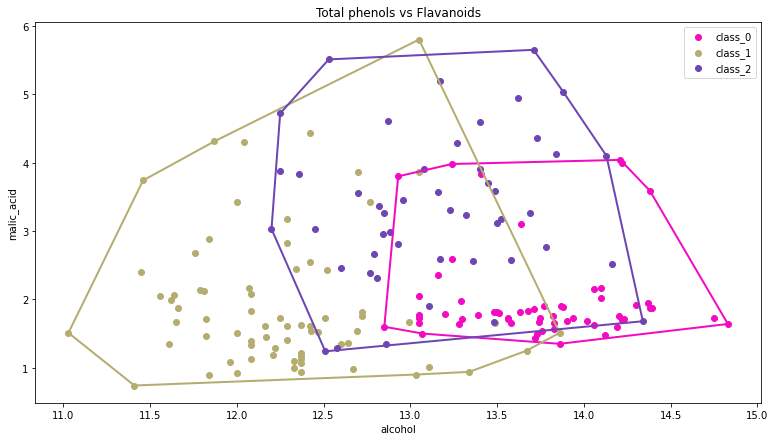

In [188]:
# Visualisasi hasil ConvexHull
plt.figure(figsize = (13, 7))

# Memunculkan warna acak dan memasukkan ke set warna
# Warna berpotensi sama, sehingga apabila terjadi, cukup run ulang 
# sampai warna yang didapatkan tidak sama
colorset = []
for itr in range(len(data.target_names)):
    hexstring = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    colorset.append(hexstring)

if option == 1:
    plt.title('Petal Width vs Petal Length')
elif option == 2:
    plt.title('Total phenols vs Flavanoids')
elif option == 3:
    plt.title('Mean Smoothness vs Mean Compactness')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

# Menginisiasi matrix berisi Convex Hull
hullMatrix = [[0, 0]]
for i in range(len(data.target_names)):
  bucket = df[df['Target'] == i]
  bucket = bucket.iloc[:,[0,1]].values
  hull = myConvexHull(bucket)
  plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i], color=colorset[i])
  for matidx in range(2):
    # Memasukkan convex hull ke dalam hullMatrix
    hullMatrix.append(hull[matidx])
del hullMatrix[0] # Menghapus elemen inisiasi hullMatrix

# Plot Convex Hull
x = 0
while x < len(hullMatrix):
  labelidx = int(x / 2)
  plt.scatter(hullMatrix[x], hullMatrix[x+1], s=10, color=colorset[labelidx])
  plt.plot(hullMatrix[x], hullMatrix[x+1], linewidth=2, color=colorset[labelidx])
  x += 2
plt.legend()